## Import necessary Python libraries 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Step1: Cleaning the data

### Load the dataset

In [2]:
df=pd.read_csv("Zomato data.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


### Check the structure of the dataset

In [3]:
df.shape

(148, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [5]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [6]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


### Removing Missing Values

In [7]:
# Remove rows where any column has missing values
null_values = df.isnull().sum()
print(null_values)

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


### Check for duplicates

In [8]:
duplicate_rows = df.duplicated()
duplicate_rows

0      False
1      False
2      False
3      False
4      False
       ...  
143    False
144    False
145    False
146    False
147    False
Length: 148, dtype: bool

### Converting 'Rate' Column to Numeric Format by Removing Denominator

In [9]:
def handleRate(value):
    value = str(value).split("/")
    value = value[0];
    return float(value)
df["rate"] = df["rate"].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


### Summary of the df

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [11]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


#### *Conclusion- There is no NULL value in df*

## Step2: Visualizing Data After Cleaning

### What is the distribution of restaurants across different types (listed_in(type))?

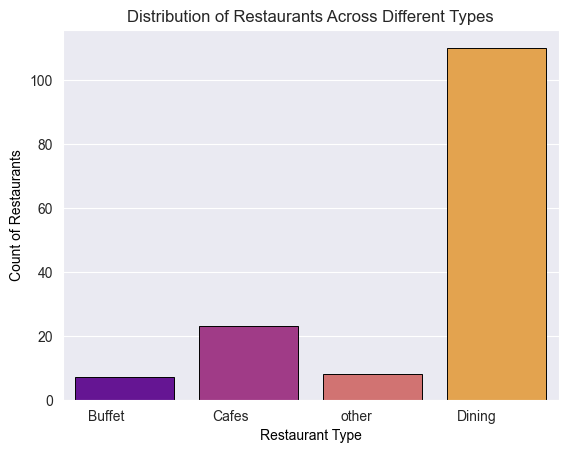

In [12]:
sns.set_style("darkgrid")
sns.countplot(x='listed_in(type)', data=df, hue='listed_in(type)', palette='plasma', edgecolor='black', linewidth=0.7, legend=False)

plt.title('Distribution of Restaurants Across Different Types')
plt.xlabel('Restaurant Type',color="black")
plt.ylabel('Count of Restaurants',color="black")

plt.xticks(rotation=0, ha='right')
plt.show()

#### *RESULT: The majority of the restaurant fall into the dining category.*

### What is the count of restaurants offering online orders (online_order) and table bookings (book_table)?

<Figure size 800x600 with 0 Axes>

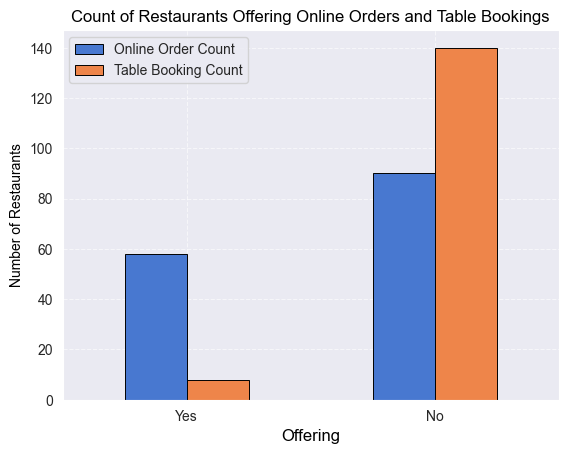

In [13]:
online_counts = df['online_order'].value_counts()
book_table_counts = df['book_table'].value_counts()

online_table_counts = pd.DataFrame({
    'Offering': ['Yes', 'No'],
    'Online Order Count': [online_counts.get('Yes', 0), online_counts.get('No', 0)],
    'Table Booking Count': [book_table_counts.get('Yes', 0), book_table_counts.get('No', 0)]
})

plt.figure(figsize=(8, 6))
palette = sns.color_palette("muted", n_colors=2)

online_table_counts.set_index('Offering').plot(kind='bar', stacked=False, color=palette, edgecolor='black', linewidth=0.7)

plt.title('Count of Restaurants Offering Online Orders and Table Bookings',color="black")
plt.ylabel('Number of Restaurants',color="black")
plt.xlabel('Offering',color="black",fontsize="12")

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=0)  
plt.show()

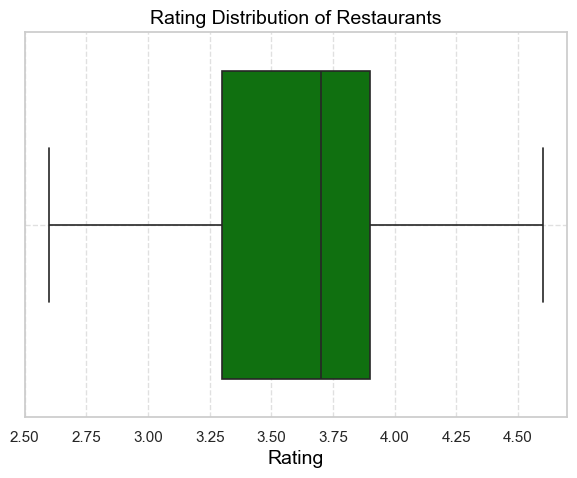

In [14]:
plt.figure(figsize=(7, 5))
sns.set_style("whitegrid")
sns.set_context("notebook")

sns.boxplot(x='rate',data=df,color="green",linewidth=1.2,legend=False)

plt.title('Rating Distribution of Restaurants',color="black",fontweight='regular',fontsize="14")
plt.xlabel('Rating',fontsize="14",color="black")
plt.grid(True, linestyle='--',linewidth=1,alpha=0.6)
plt.show()


## How do the number of votes (votes) relate to the restaurant ratings (rate)?

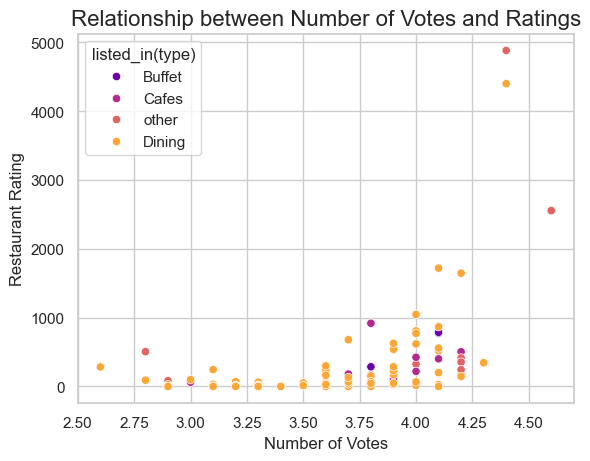

In [15]:
sns.set_style("whitegrid")
sns.scatterplot(x="rate", y="votes", data=df,hue="listed_in(type)",palette="plasma")

plt.title('Relationship between Number of Votes and Ratings', fontsize=16)
plt.xlabel('Number of Votes', fontsize=12)
plt.ylabel('Restaurant Rating', fontsize=12)


plt.show()

## What is the price distribution (approx_cost(for two people)) at different restaurants?

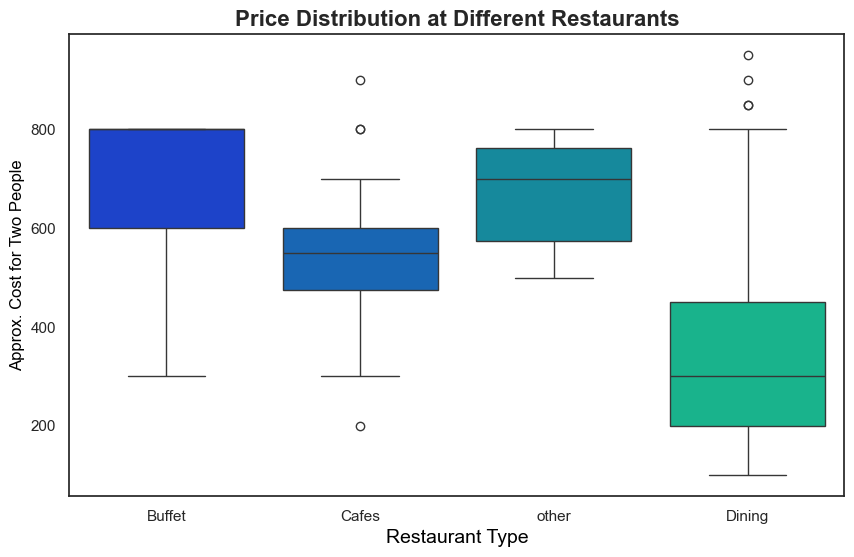

In [16]:
sns.set_style("white")
plt.figure(figsize=(10, 6))
sns.set_context("notebook")

palette = sns.color_palette("winter", n_colors=4)
sns.boxplot(x='listed_in(type)', y='approx_cost(for two people)', data=df,hue='listed_in(type)', palette=palette, legend=False)

plt.title('Price Distribution at Different Restaurants', fontsize=16, fontweight='semibold')
plt.xlabel('Restaurant Type', fontsize=14, color="black")
plt.ylabel('Approx. Cost for Two People', fontsize=12, color="black")

# Show the plot
plt.xticks(rotation=0) 
plt.show()


## What proportion of restaurants offer online orders and table bookings?

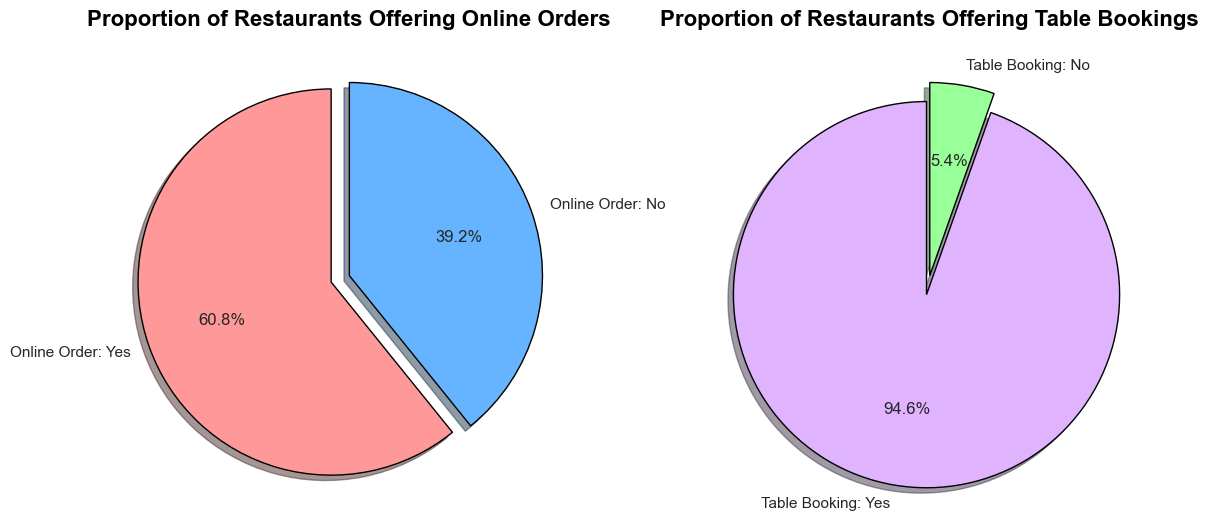

In [17]:
online_order_proportion = df['online_order'].value_counts(normalize=True)
book_table_proportion = df['book_table'].value_counts(normalize=True)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

online_order_proportion.plot.pie(autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], startangle=90, 
                                 labels=['Online Order: Yes', 'Online Order: No'], 
                                 wedgeprops={'edgecolor': 'black'}, shadow=True, explode=(0.1, 0))
plt.title('Proportion of Restaurants Offering Online Orders', fontsize=16, fontweight='bold', color='black')
plt.ylabel('')

plt.subplot(1, 2, 2)
book_table_proportion.plot.pie(autopct='%1.1f%%', colors=['#e0b3ff', '#99ff99'], startangle=90, 
                               labels=['Table Booking: Yes', 'Table Booking: No'], 
                               wedgeprops={'edgecolor': 'black'}, shadow=True, explode=(0.1, 0))
plt.title('Proportion of Restaurants Offering Table Bookings', fontsize=16, fontweight='bold', color='black')
plt.ylabel('')  

plt.tight_layout()

plt.show()


##  What is the distribution of restaurants offering online orders across different restaurant types

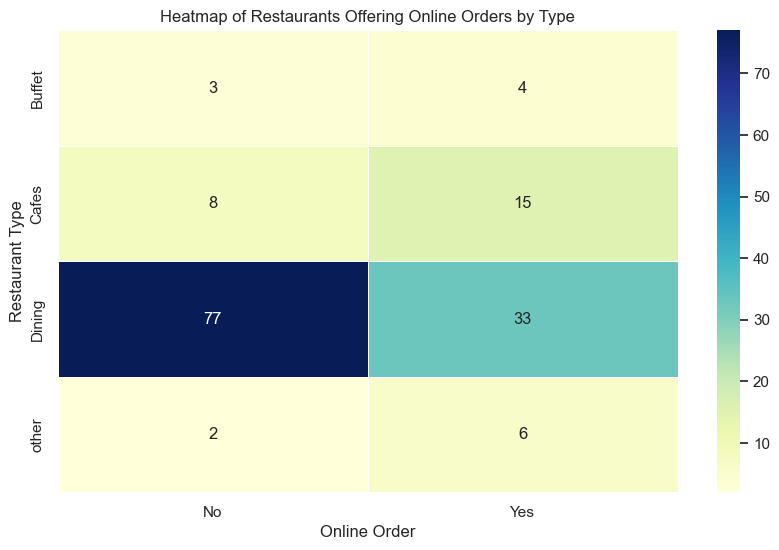

In [18]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5,linecolor='white')

plt.title('Heatmap of Restaurants Offering Online Orders by Type')
plt.xlabel('Online Order')
plt.ylabel('Restaurant Type')
plt.show()

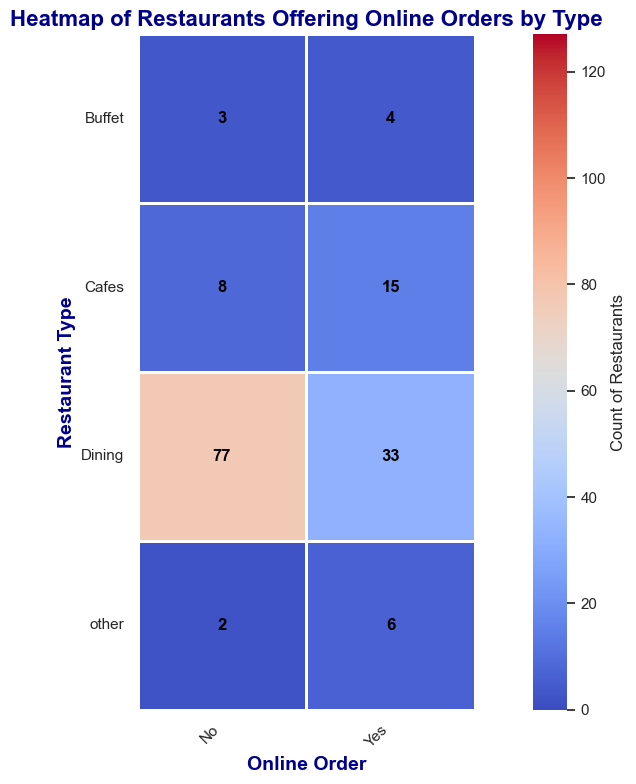

In [19]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, 
            annot=True,               
            cmap="coolwarm",          
            fmt="d",                  
            linewidths=1,              
            linecolor='white',         
            cbar_kws={'label': 'Count of Restaurants'},  
            annot_kws={'size': 12, 'weight': 'bold', 'color': 'black'}, 
            square=True,              
            vmin=0,                    
            vmax=pivot_table.max().max() + 50)  

plt.title('Heatmap of Restaurants Offering Online Orders by Type', fontsize=16, fontweight='bold', color='darkblue')

plt.xlabel('Online Order', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Restaurant Type', fontsize=14, fontweight='bold', color='darkblue')

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout() 
plt.show()
